In [4]:
import mlflow
import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt
from numpy import savetxt
import time
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [5]:
db = load_digits()
X = db.data
y = db.target
print("Shape X : ",X.shape)
print("Shape y : ",y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape X :  (1797, 64)
Shape y :  (1797,)


In [6]:
# Set our tracking server uri for logging
#mlflow_uri ="http://127.0.0.1:8080"
#mlflow.set_experiment(mlflow_uri)

# # Create a new MLflow Experiment
mlflow.set_tracking_uri("sqlite:///mlruns.db")
time.sleep(15)
experiment_id = "v2_logging_api1"
print("experiment_id : ",experiment_id)
mlflow.set_experiment(experiment_id)


experiment_id :  v2_logging_api1


<Experiment: artifact_location='/Users/tharhtet/Documents/github/ML-in-Prod-batch-1/8_Experiment_Tracking/mlruns/3', creation_time=1726947197785, experiment_id='3', last_update_time=1726947197785, lifecycle_stage='active', name='v2_logging_api1', tags={}>

### MLflow AutoLog testing

In [7]:
# Mlflow autolog
mlflow.sklearn.autolog()

# for GPU info please install this
# pip install pynvml

mlflow.enable_system_metrics_logging()


2024/09/22 02:47:16 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


## Logging custom parameters and artifacts store 

2024/09/22 02:48:10 WARNING mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics because creating `GPUMonitor` failed with error: Failed to initialize NVML, skip logging GPU metrics: NVML Shared Library Not Found.
2024/09/22 02:48:10 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.
2024/09/22 02:48:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/22 02:48:27 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2024/09/22 02:48:27 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!


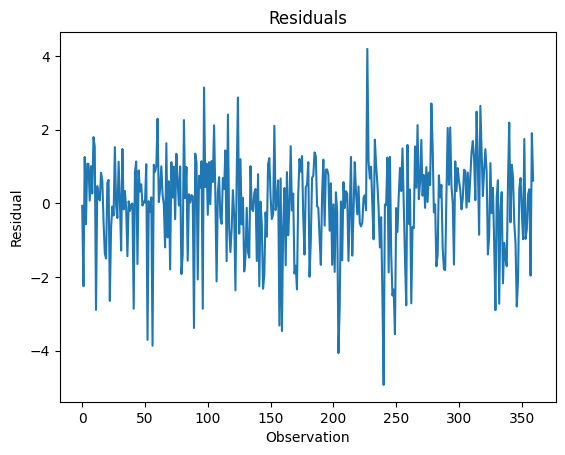

In [9]:
import time
with mlflow.start_run(log_system_metrics = True) as run:
    time.sleep(15)


    n_estimators = 110
    max_depth = 10
    max_features = 3

    rf =  RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features)
    rf.fit(X_train,y_train)

    mlflow.log_param("num_trees", n_estimators)
    mlflow.log_param("maxdepath", max_depth)
    mlflow.log_param("max_feat", max_features)

    predictions = rf.predict(X_test)
    # Define metric to use evaluate model
    mse = mean_squared_error(y_test, predictions)
    mlflow.log_metric("mse", mse)

    #Log the mode created by this run
    mlflow.sklearn.log_model(rf,"random_forest_model")
    
    savetxt("predictions.csv", predictions, delimiter=",")
    #Log the saved table as an artifacts

    mlflow.log_artifact("predictions.csv")

    # Convert the loss
    temp_df = pd.DataFrame(data=predictions- y_test)
    plt.plot(temp_df)
    plt.xlabel("Observation")
    plt.ylabel("Residual")
    plt.title("Residuals")

    plt.savefig("residuals_plot.png")
    mlflow.log_artifact("residuals_plot.png")

In [10]:

print(mlflow.MlflowClient().get_run(run.info.run_id).data)


<RunData: metrics={'mse': 1.7395915650948228,
 'system/cpu_utilization_percentage': 0.0,
 'system/disk_available_megabytes': 730966.1,
 'system/disk_usage_megabytes': 263696.5,
 'system/disk_usage_percentage': 26.5,
 'system/network_receive_megabytes': 0.0010240000001431326,
 'system/network_transmit_megabytes': 0.0010239999996883853,
 'system/system_memory_usage_megabytes': 6310.6,
 'system/system_memory_usage_percentage': 32.7,
 'training_mean_absolute_error': 0.6267154884560215,
 'training_mean_squared_error': 0.6602568630893256,
 'training_r2_score': 0.9206484849979529,
 'training_root_mean_squared_error': 0.8125619133883434,
 'training_score': 0.9206484849979529}, params={'bootstrap': 'True',
 'ccp_alpha': '0.0',
 'criterion': 'squared_error',
 'max_depth': '10',
 'max_feat': '3',
 'max_features': '3',
 'max_leaf_nodes': 'None',
 'max_samples': 'None',
 'maxdepath': '10',
 'min_impurity_decrease': '0.0',
 'min_samples_leaf': '1',
 'min_samples_split': '2',
 'min_weight_fraction_le

### Reset the experiment and Run

In [11]:
import mlflow
import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt
from numpy import savetxt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [12]:
db = load_digits()
X = db.data
y = db.target
print("Shape X : ",X.shape)
print("Shape y : ",y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape X :  (1797, 64)
Shape y :  (1797,)


In [13]:
experiment_name = "v2_logging_api"

In [14]:
experiment = mlflow.set_experiment(experiment_name)
with mlflow.start_run():
    n_estimators = 110
    max_depth = 10
    max_features = 3

    rf =  RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features)
    rf.fit(X_train,y_train)

# Experiment Details
print("EXperiment id: {}".format(experiment.experiment_id))
print("Artifcats Location: {}".format(experiment.artifact_location)) 
print("Tags : {}".format(experiment.tags))
print("lifecycle_stage : {}".format(experiment.lifecycle_stage))

MlflowException: Cannot set a deleted experiment 'v2_logging_api' as the active experiment. You can restore the experiment, or permanently delete the experiment to create a new one.